<a href="https://colab.research.google.com/github/SaberinaSaberon/Projects/blob/main/Indebted_Communication_Engagement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries, data profiling

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [219]:
df = pd.read_csv('/content/communications 2.csv')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145941 entries, 0 to 145940
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   message_id        145941 non-null  object 
 1   customer_id       145941 non-null  object 
 2   sent_at           145941 non-null  object 
 3   clicked           145941 non-null  int64  
 4   converted         145941 non-null  int64  
 5   client_id         145941 non-null  object 
 6   gender            114265 non-null  object 
 7   customer_country  115795 non-null  object 
 8   age               123921 non-null  float64
 9   created_at        145941 non-null  object 
 10  client_name       145941 non-null  object 
 11  product_type      145941 non-null  object 
 12  client_country    145941 non-null  object 
 13  channel           145941 non-null  object 
 14  message_number    145941 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 16.7+ MB


In [221]:
df.isnull().sum()

message_id              0
customer_id             0
sent_at                 0
clicked                 0
converted               0
client_id               0
gender              31676
customer_country    30146
age                 22020
created_at              0
client_name             0
product_type            0
client_country          0
channel                 0
message_number          0
dtype: int64

Since nulls depend on customer information, dataframe with index as customer must be created.

# Impute missing values

## Creating customer table

In [222]:
# checking the number of unique customers
df['customer_id'].nunique()

9751

In [223]:
# checking if there is one corresponding client_name for every customer (one is to one) before dropping duplicates
df['cust_client'] = df[['customer_id','client_name']].agg('-'.join,axis=1)
df.head()

,message_id,customer_id,sent_at,clicked,converted,client_id,gender,customer_country,age,created_at,client_name,product_type,client_country,channel,message_number,cust_client
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-04 10:03:16.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,1.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay
1,0f98a1bbf7f2b66f420816a65c8d9b77,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-12 08:34:09.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,2.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay
2,97f9ed967d2334ce0b4ebfcfc9b5c25c,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-19 08:58:11.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,3.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay
3,3d0615ca493d69e16265ab688495c134,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-28 10:43:04.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,4.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay
4,3eb3a03a007bd1adf7482e6d95f7b942,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-02-04 11:28:56.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,5.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay


In [224]:
# checking unique combinations of cust_client
df['cust_client'].nunique()

9751

1 is to 1 (there is only 1 client for every customer)

In [225]:
# creating dataframe with customer as index
customer = df[['customer_id','gender','customer_country','client_country','client_name','product_type','age']]

In [226]:
customer = customer.drop_duplicates(subset='customer_id')
customer

,customer_id,gender,customer_country,client_country,client_name,product_type,age
0,f13e966f9dc1e2aa7bffec6c9efa8e11,F,NaN,UK,SwanPay,BNPL,51.0
37,26c5f8755c296b92685959c57114ba75,F,NZ,UK,SwanPay,BNPL,28.0
76,06e72df8cce37d99724e98a89ff031e0,F,UK,UK,SwanPay,BNPL,24.0
79,e6717778f83882b9ff53eeaac7b4f0ec,M,UK,UK,SwanPay,BNPL,26.0
117,af619bc3c632139b350370727103dcfb,F,NZ,UK,SwanPay,BNPL,22.0
...,...,...,...,...,...,...,...
145936,3f58b9ce296dbdc59001a366501b8ea1,F,CA,CA,Beaver Bank,CreditCard,NaN
145937,8d788102b7e7e8deb2286396e2a8878d,M,CA,CA,Beaver Bank,CreditCard,46.0
145938,21a0b5def79c5b2d66e9ad4c0cc3fb3b,M,CA,CA,Beaver Bank,CreditCard,55.0
145939,ecd70b4e32b3b7496c8070acf0b98965,M,CA,CA,Beaver Bank,CreditCard,54.0


Dataframe is now in terms of customer_id.

In [227]:
customer['client_name'].value_counts()

SwanPay         2648
Badgerbank      1586
KiwiPay         1359
Moose Money     1298
Fox Energy      1034
Beaver Bank      757
Skink Solar      548
Eagle Energy     521
Name: client_name, dtype: int64

In [228]:
customer.isnull().sum()

customer_id            0
gender              1977
customer_country    1897
client_country         0
client_name            0
product_type           0
age                 1384
dtype: int64

## Imputing missing values for age

In [229]:
customer.describe()

,age
count,8367.000000
mean,40.984821
std,17.638002
min,18.000000
25%,25.000000
50%,38.000000
75%,52.000000
max,96.000000


(array([ 64., 188., 289., 310., 367., 341., 348., 327., 280., 254., 236.,
        201., 192., 199., 135., 112.,  94.,  77.,  80.,  60.,  85.,  90.,
         81.,  92.,  75.,  74., 101., 100., 110.,  93., 112., 135., 127.,
        747., 134., 105., 133., 144., 121., 110., 103.,  93.,  79.,  92.,
         78.,  73.,  54.,  50.,  47.,  48.,  45.,  42.,  40.,  44.,  58.,
         43.,  48.,  33.,  35.,  27.,  40.,  36.,  20.,  30.,  32.,  15.,
         25.,   9.,  13.,  16.,  13.,  14.,  13.,  10.,   9.,   5.,   4.,
          8.]),
 array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
        83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
        96.]),
 <BarContaine

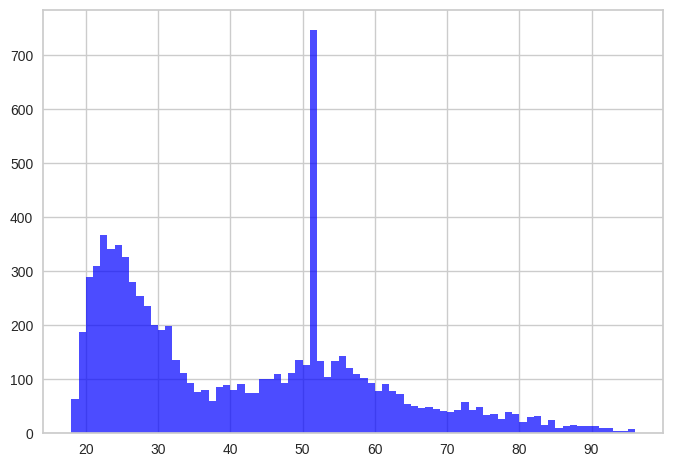

In [230]:
plt.hist(customer['age'], bins=78, color='blue', alpha=0.7)

Spike of number of customers with age of 51. Need to retrieve date of birth of customers or need to ask with data owners if this make sense. For now, assume that there is some error for this age and consider as null values.

In [231]:
# replace 51 with nan
customer['age'].replace([51],np.nan,inplace=True)

In [232]:
customer.isnull().sum()

customer_id            0
gender              1977
customer_country    1897
client_country         0
client_name            0
product_type           0
age                 2131
dtype: int64

<Axes: xlabel='age'>

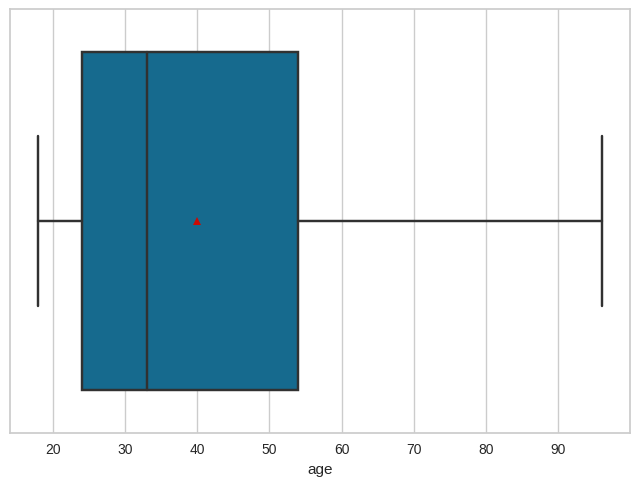

In [233]:
sns.boxplot(data=customer,x='age',showmeans=True)

<Axes: xlabel='age', ylabel='client_name'>

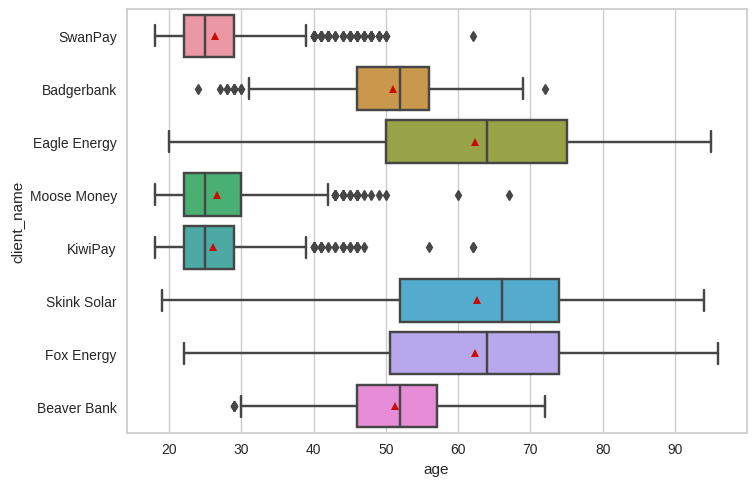

In [234]:
# check customers age per client
sns.boxplot(data=customer,x='age',y='client_name',showmeans=True)

<Axes: xlabel='age', ylabel='product_type'>

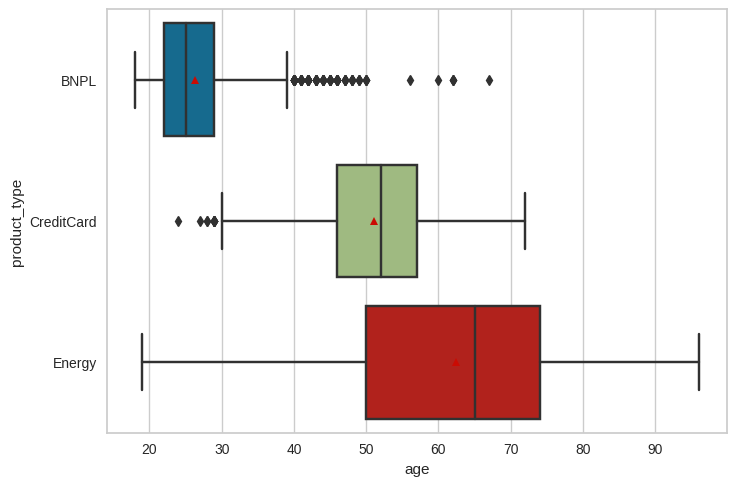

In [235]:
# check customers age per product type
sns.boxplot(data=customer,x='age',y='product_type',showmeans=True)

In [236]:
# check if there is only product type for every client
df.groupby('client_name')['product_type'].value_counts()

client_name   product_type
Badgerbank    CreditCard      29007
Beaver Bank   CreditCard      12408
Eagle Energy  Energy           8103
Fox Energy    Energy          17137
KiwiPay       BNPL            20876
Moose Money   BNPL            12396
Skink Solar   Energy           9904
SwanPay       BNPL            36110
Name: product_type, dtype: int64

From the boxplot and table above, it can be observed the age distribution per client. Each client also offers specific product type.

* KiwiPay, Moose Money, Swan Pay offer BNPL (Buy Now Pay Later) and most of the
clients are the younger generation (ages 20-30)
* BadgerBank and Beaver Bank offer CreditCard and most of the customers are ages 45-55.
* Eagle Energy, Fox Energy and Skink Solar offer Energy and for wider generation.


In [237]:
# check frequency of missing values per client
missing_age_per_client_name = customer.groupby('client_name')['age'].apply(lambda x: x.isnull().sum() / len(x))
missing_age_per_client_name.to_frame()

,age
client_name,
Badgerbank,0.289407
Beaver Bank,0.110964
Eagle Energy,0.097889
Fox Energy,0.251451
KiwiPay,0.284768
Moose Money,0.071649
Skink Solar,0.262774
SwanPay,0.246601


In [238]:
# imputation will be done by product type

# imputation by median since there are outliers per category
age_median_BNPL = customer[customer['product_type']=='BNPL']['age'].median()
age_median_CC = customer[customer['product_type']=='CreditCard']['age'].median()

customer['age'] = np.where((customer['product_type']=='BNPL') & (customer['age'].isnull()),age_median_BNPL,customer['age'])
customer['age'] = np.where((customer['product_type']=='CreditCard') & (customer['age'].isnull()),age_median_CC, customer['age'])

# imputation by mean since no outliers
age_median_energy = customer[customer['product_type']=='Energy']['age'].mean()

customer['age'] = np.where((customer['product_type']=='Energy') & (customer['age'].isnull()),age_median_energy,customer['age'])


<Axes: xlabel='age', ylabel='product_type'>

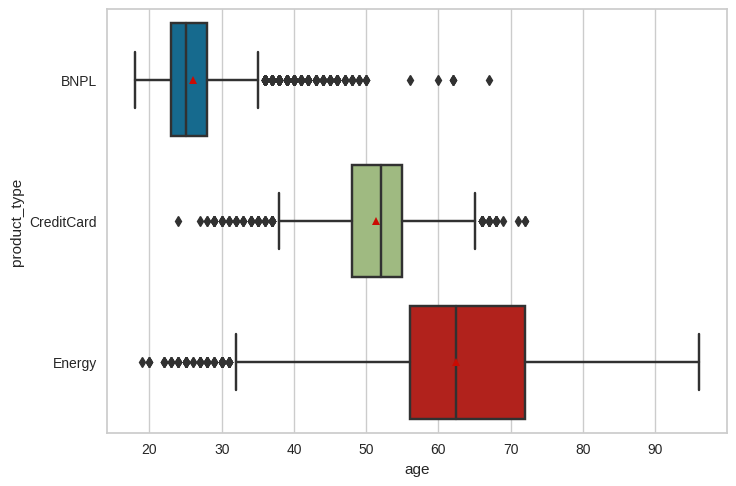

In [239]:
sns.boxplot(data=customer,x='age',y='product_type',showmeans=True)

(array([  64.,  188.,  289.,  310.,  367.,  341.,  348., 1460.,  280.,
         254.,  236.,  201.,  192.,  199.,  135.,  112.,   94.,   77.,
          80.,   60.,   85.,   90.,   81.,   92.,   75.,   74.,  101.,
         100.,  110.,   93.,  112.,  135.,  127.,    0.,  677.,  105.,
         133.,  144.,  121.,  110.,  103.,   93.,   79.,   92.,  533.,
          73.,   54.,   50.,   47.,   48.,   45.,   42.,   40.,   44.,
          58.,   43.,   48.,   33.,   35.,   27.,   40.,   36.,   20.,
          30.,   32.,   15.,   25.,    9.,   13.,   16.,   13.,   14.,
          13.,   10.,    9.,    5.,    4.,    8.]),
 array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
        83., 84

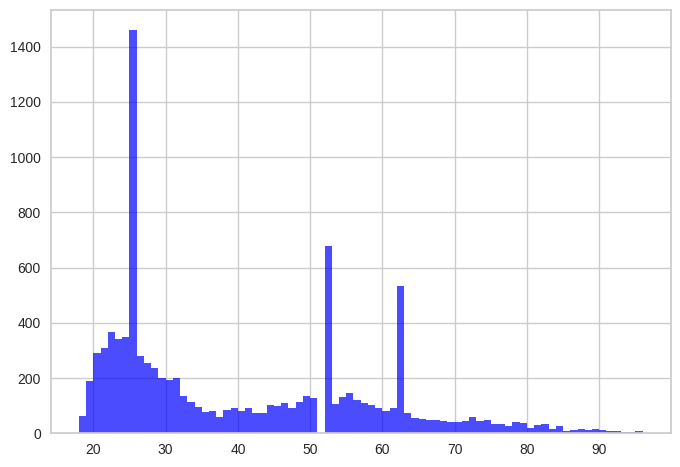

In [240]:
plt.hist(customer['age'], bins=78, color='blue', alpha=0.7)

## Impute missing values for customer_country

<Axes: xlabel='client_country', ylabel='count'>

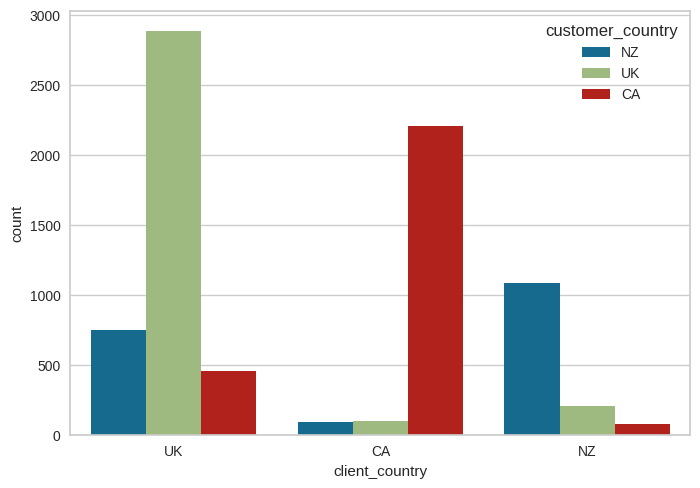

In [241]:
sns.countplot(data=customer, x='client_country', hue='customer_country')

It can be implied here that most of the customers lived in the same country where the client is based.

In [242]:
# impute missing values for customer_country using client_country
customer['customer_country'] = np.where(customer['customer_country'].isnull(),customer['client_country'],customer['customer_country'])

<Axes: xlabel='client_country', ylabel='count'>

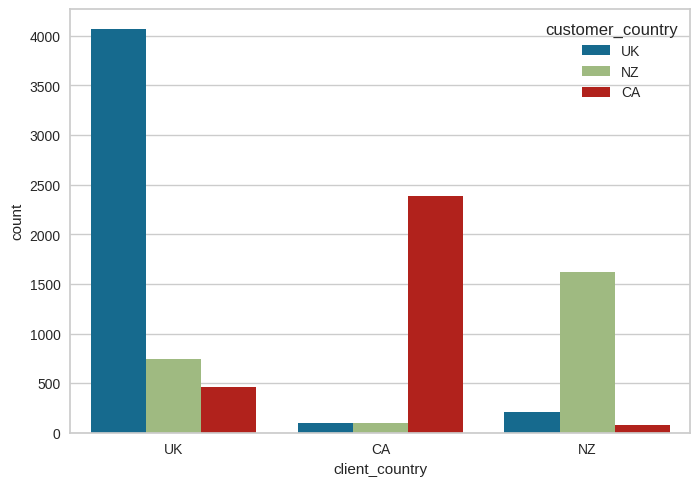

In [243]:
sns.countplot(data=customer, x='client_country', hue='customer_country')

In [244]:
# computing margin of error per client country

client_UK = customer[customer['client_country']=='UK']
client_CA = customer[customer['client_country']=='CA']
client_NZ = customer[customer['client_country']=='NZ']

In [245]:
# compute margin of error
import scipy.stats as stats
import math

In [246]:
# compute margin of error for UK
specific_category = 'UK'
proportion_specific_category_UK = client_UK['customer_country'].value_counts(normalize=True).get(specific_category, 0)
sample_size = client_UK['customer_country'].count()
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the standard error
se = math.sqrt((proportion_specific_category_UK * (1 - proportion_specific_category_UK)) / sample_size)

# Calculate the margin of error
margin_of_error = z_score * se

margin_of_error

0.011335548259382752

In [247]:
proportion_specific_category_UK

0.7716400911161732

Of all the customers with client based in UK, 77.16% of it is based in UK with 1.13 % margin of error.

In [248]:
# compute margin of error for CA
specific_category = 'CA'
proportion_specific_category_CA = client_CA['customer_country'].value_counts(normalize=True).get(specific_category, 0)
sample_size = client_CA['customer_country'].count()
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the standard error
se = math.sqrt((proportion_specific_category_CA * (1 - proportion_specific_category_CA)) / sample_size)

# Calculate the margin of error
margin_of_error = z_score * se

margin_of_error

0.010190630304002019

In [249]:
proportion_specific_category_CA

0.9246894409937888

Of all the customers with client based in CA, 92.5% of it is based in CA with 1.02 % margin of error.

In [250]:
# compute margin of error for NZ
specific_category = 'NZ'
proportion_specific_category_NZ = client_NZ['customer_country'].value_counts(normalize=True).get(specific_category, 0)
sample_size = client_NZ['customer_country'].count()
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the standard error
se = math.sqrt((proportion_specific_category_NZ * (1 - proportion_specific_category_NZ)) / sample_size)

# Calculate the margin of error
margin_of_error = z_score * se

margin_of_error

0.0160479849019506

In [251]:
proportion_specific_category_NZ

0.8495018353434715

Of all the customers with client based in NZ, 85% of the customers are based in NZ as well with 1.6% margin of error.

In [252]:
customer.isnull().sum()

customer_id            0
gender              1977
customer_country       0
client_country         0
client_name            0
product_type           0
age                    0
dtype: int64

## Impute missing values for gender

<Axes: xlabel='gender', ylabel='count'>

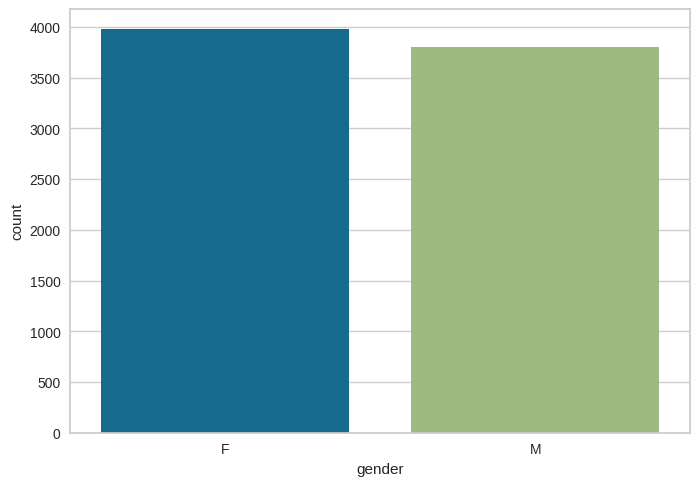

In [253]:
sns.countplot(data=customer, x='gender')

In [254]:
cat_gender = customer['gender'].value_counts(normalize=True)
cat_gender

F    0.511448
M    0.488552
Name: gender, dtype: float64

Since proportion of gender is fairly same, use 'Others' to impute missing values under gender

In [255]:
# impute missing values for gender
# use 'Others' since count for F and M are fairly same
customer['gender'] = np.where(customer['gender'].isnull(),'Others',customer['gender'])

In [256]:
customer.isnull().sum()

customer_id         0
gender              0
customer_country    0
client_country      0
client_name         0
product_type        0
age                 0
dtype: int64

# Creating file for Tableau visualization

In [257]:
# customers info are already complete
customer = customer[['customer_id','gender','customer_country','age']]

In [258]:
# merging original dataframe and customer table
df1 = pd.merge(df,customer,on='customer_id',how='left')
df1

,message_id,customer_id,sent_at,clicked,converted,client_id,gender_x,customer_country_x,age_x,created_at,client_name,product_type,client_country,channel,message_number,cust_client,gender_y,customer_country_y,age_y
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-04 10:03:16.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,1.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
1,0f98a1bbf7f2b66f420816a65c8d9b77,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-12 08:34:09.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,2.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
2,97f9ed967d2334ce0b4ebfcfc9b5c25c,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-19 08:58:11.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,3.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
3,3d0615ca493d69e16265ab688495c134,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-28 10:43:04.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,4.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
4,3eb3a03a007bd1adf7482e6d95f7b942,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-02-04 11:28:56.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,5.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145936,76d93652f659e6ca7839e0e9543f2e4a,3f58b9ce296dbdc59001a366501b8ea1,2021-10-01 10:07:04.692000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,F,CA,NaN,2021-09-25 20:53:43.692000+00:00,Beaver Bank,CreditCard,CA,Email,1.0,3f58b9ce296dbdc59001a366501b8ea1-Beaver Bank,F,CA,52.0
145937,0a455855ccb00df28936e8ce9d4dc06e,8d788102b7e7e8deb2286396e2a8878d,2021-10-01 11:47:01.683000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,M,CA,46.0,2021-09-20 19:29:52.683000+00:00,Beaver Bank,CreditCard,CA,Email,1.0,8d788102b7e7e8deb2286396e2a8878d-Beaver Bank,M,CA,46.0
145938,cc0fffcd2b61f6d042b57dee6ac708b1,21a0b5def79c5b2d66e9ad4c0cc3fb3b,2021-10-01 12:48:57.220000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,M,CA,55.0,2021-09-24 11:09:14.220000+00:00,Beaver Bank,CreditCard,CA,SMS,1.0,21a0b5def79c5b2d66e9ad4c0cc3fb3b-Beaver Bank,M,CA,55.0
145939,fa847a2010017f81261bbc19f2b7819e,ecd70b4e32b3b7496c8070acf0b98965,2021-10-01 13:33:02.070000+00:00,0,0,e4da3b7fbbce2345d7772b0674a318d5,M,CA,54.0,2021-09-22 10:44:41.070000+00:00,Beaver Bank,CreditCard,CA,Email,1.0,ecd70b4e32b3b7496c8070acf0b98965-Beaver Bank,M,CA,54.0


In [259]:
df1.isnull().sum()

message_id                0
customer_id               0
sent_at                   0
clicked                   0
converted                 0
client_id                 0
gender_x              31676
customer_country_x    30146
age_x                 22020
created_at                0
client_name               0
product_type              0
client_country            0
channel                   0
message_number            0
cust_client               0
gender_y                  0
customer_country_y        0
age_y                     0
dtype: int64

In [260]:
# drop original columns with missing values
df1.drop(columns=['gender_x','customer_country_x','age_x'],inplace=True)

# rename column name
df1.rename(columns = {'gender_y':'gender','customer_country_y':'customer_country','age_y':'age'}, inplace = True)
df1.head()

,message_id,customer_id,sent_at,clicked,converted,client_id,created_at,client_name,product_type,client_country,channel,message_number,cust_client,gender,customer_country,age
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-04 10:03:16.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,1.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
1,0f98a1bbf7f2b66f420816a65c8d9b77,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-12 08:34:09.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,SMS,2.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
2,97f9ed967d2334ce0b4ebfcfc9b5c25c,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-19 08:58:11.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,3.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
3,3d0615ca493d69e16265ab688495c134,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-01-28 10:43:04.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,4.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0
4,3eb3a03a007bd1adf7482e6d95f7b942,f13e966f9dc1e2aa7bffec6c9efa8e11,2021-02-04 11:28:56.376000+00:00,0,0,cfcd208495d565ef66e7dff9f98764da,2021-01-03 15:58:50.376000+00:00,SwanPay,BNPL,UK,Email,5.0,f13e966f9dc1e2aa7bffec6c9efa8e11-SwanPay,F,UK,25.0


In [261]:
df1.isnull().sum()

message_id          0
customer_id         0
sent_at             0
clicked             0
converted           0
client_id           0
created_at          0
client_name         0
product_type        0
client_country      0
channel             0
message_number      0
cust_client         0
gender              0
customer_country    0
age                 0
dtype: int64

In [262]:
# saving dataframe to be loaded to Tableau
# df1.to_csv('comms2.csv')

# Feature Engineering

In [263]:
# sort message_number values descending to retrieve the max number of messages a customer received
df1.sort_values(by='message_number', ascending=False, inplace=True)
df1.head()

,message_id,customer_id,sent_at,clicked,converted,client_id,created_at,client_name,product_type,client_country,channel,message_number,cust_client,gender,customer_country,age
106721,869bd429997671b522f1ee11513e06b2,3d8d8864b7b853bbd47329484c9cc072,2021-09-29 17:20:11.060000+00:00,0,0,a87ff679a2f3e71d9181a67b7542122c,2021-01-02 18:24:34.060000+00:00,Skink Solar,Energy,NZ,Email,39.0,3d8d8864b7b853bbd47329484c9cc072-Skink Solar,M,NZ,32.0
36381,c541e2c9ee0bfed0b3d00869a9f171e4,c72bc8d72687f78c0b255583eaff54e9,2021-09-28 08:15:27.266000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-01 03:58:22.266000+00:00,Badgerbank,CreditCard,UK,Email,39.0,c72bc8d72687f78c0b255583eaff54e9-Badgerbank,M,UK,54.0
85920,eb0b8d194290683f0920c9abfccba4a3,400836904a0e58d2cc66cf7e9afaebe1,2021-09-29 11:54:22.443000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-01 11:32:44.443000+00:00,KiwiPay,BNPL,NZ,Email,39.0,400836904a0e58d2cc66cf7e9afaebe1-KiwiPay,Others,NZ,26.0
85959,df0c4609886f2658261bc402cebabe03,342991767559fd5eeab7261bdf2e8131,2021-10-01 09:20:28.018000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-03 23:13:05.018000+00:00,KiwiPay,BNPL,NZ,SMS,39.0,342991767559fd5eeab7261bdf2e8131-KiwiPay,Others,NZ,25.0
36478,ed2f61709171a79a5cb8058a7539e1c8,94974d8b8e75fd17eb41b8b5c2c46c9e,2021-09-28 14:40:26.958000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-03 18:17:49.958000+00:00,Badgerbank,CreditCard,UK,Email,39.0,94974d8b8e75fd17eb41b8b5c2c46c9e-Badgerbank,F,UK,56.0


In [267]:
# get the number of clicks per customer
df1_clicks = df1[['clicked','customer_id']]
df1_clicks = df1.groupby('customer_id')['clicked'].sum()
df1_clicks.to_frame()

,clicked
customer_id,
00043de85b74cba03f23dfe600b781bb,0
0004a5f5de52a32daabb66e9c69ca05a,3
0021b8a5c5747c1b2cdca92c54d68d2b,0
002cb5e3ce196755e4705e3ce2253077,1
0033da85f997a74fdffc322dc6f6d217,0
...,...
ffe024dcd6ec4d3798127503d4dbb8ed,4
ffed8cc72339800f9312982f67fdb403,0
ffeed42a799e49253f4d048ff3f84383,2


In [268]:
# drop duplicates
df1.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)
df1

,message_id,customer_id,sent_at,clicked,converted,client_id,created_at,client_name,product_type,client_country,channel,message_number,cust_client,gender,customer_country,age
106721,869bd429997671b522f1ee11513e06b2,3d8d8864b7b853bbd47329484c9cc072,2021-09-29 17:20:11.060000+00:00,0,0,a87ff679a2f3e71d9181a67b7542122c,2021-01-02 18:24:34.060000+00:00,Skink Solar,Energy,NZ,Email,39.0,3d8d8864b7b853bbd47329484c9cc072-Skink Solar,M,NZ,32.0
36381,c541e2c9ee0bfed0b3d00869a9f171e4,c72bc8d72687f78c0b255583eaff54e9,2021-09-28 08:15:27.266000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-01 03:58:22.266000+00:00,Badgerbank,CreditCard,UK,Email,39.0,c72bc8d72687f78c0b255583eaff54e9-Badgerbank,M,UK,54.0
85920,eb0b8d194290683f0920c9abfccba4a3,400836904a0e58d2cc66cf7e9afaebe1,2021-09-29 11:54:22.443000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-01 11:32:44.443000+00:00,KiwiPay,BNPL,NZ,Email,39.0,400836904a0e58d2cc66cf7e9afaebe1-KiwiPay,Others,NZ,26.0
85959,df0c4609886f2658261bc402cebabe03,342991767559fd5eeab7261bdf2e8131,2021-10-01 09:20:28.018000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-03 23:13:05.018000+00:00,KiwiPay,BNPL,NZ,SMS,39.0,342991767559fd5eeab7261bdf2e8131-KiwiPay,Others,NZ,25.0
36478,ed2f61709171a79a5cb8058a7539e1c8,94974d8b8e75fd17eb41b8b5c2c46c9e,2021-09-28 14:40:26.958000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-03 18:17:49.958000+00:00,Badgerbank,CreditCard,UK,Email,39.0,94974d8b8e75fd17eb41b8b5c2c46c9e-Badgerbank,F,UK,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85615,451dc912baea0c51644aa7c6034c37e7,8bab07b13168f88eaf01094ad32079cc,2021-10-01 16:25:54.930000+00:00,0,0,1679091c5a880faf6fb5e6087eb1b2dc,2021-09-23 04:37:13.930000+00:00,Moose Money,BNPL,CA,SMS,1.0,8bab07b13168f88eaf01094ad32079cc-Moose Money,M,CA,22.0
86570,9adc34f6c96d06e26edd82211fd0d139,babbe6b7c83c804bb2b5f6c8ac268840,2021-01-14 15:06:46.109000+00:00,1,1,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-10 21:28:44.109000+00:00,KiwiPay,BNPL,NZ,Email,1.0,babbe6b7c83c804bb2b5f6c8ac268840-KiwiPay,F,NZ,25.0
86874,46bb5f71f9bef1a90e03377dad9002cb,e4b8745dd11be8de471d1de61401ad5b,2021-01-18 08:09:22.099000+00:00,1,1,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-08 18:09:29.099000+00:00,KiwiPay,BNPL,NZ,SMS,1.0,e4b8745dd11be8de471d1de61401ad5b-KiwiPay,Others,UK,25.0
86433,eb611813a6ddbcd0f842b8ba97b9795b,e51cb4bc9f4135b1b9993d59efee80e2,2021-01-13 11:26:23.590000+00:00,1,1,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-05 08:35:26.590000+00:00,KiwiPay,BNPL,NZ,Email,1.0,e51cb4bc9f4135b1b9993d59efee80e2-KiwiPay,F,CA,19.0


In [269]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9751 entries, 106721 to 145940
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   message_id        9751 non-null   object 
 1   customer_id       9751 non-null   object 
 2   sent_at           9751 non-null   object 
 3   clicked           9751 non-null   int64  
 4   converted         9751 non-null   int64  
 5   client_id         9751 non-null   object 
 6   created_at        9751 non-null   object 
 7   client_name       9751 non-null   object 
 8   product_type      9751 non-null   object 
 9   client_country    9751 non-null   object 
 10  channel           9751 non-null   object 
 11  message_number    9751 non-null   float64
 12  cust_client       9751 non-null   object 
 13  gender            9751 non-null   object 
 14  customer_country  9751 non-null   object 
 15  age               9751 non-null   float64
dtypes: float64(2), int64(2), object(12)

In [270]:
# get hour when the message was sent
df1['sent_at'] = pd.to_datetime(df1['sent_at'])
df1['hour'] = df1['sent_at'].dt.hour
df1.head()

,message_id,customer_id,sent_at,clicked,converted,client_id,created_at,client_name,product_type,client_country,channel,message_number,cust_client,gender,customer_country,age,hour
106721,869bd429997671b522f1ee11513e06b2,3d8d8864b7b853bbd47329484c9cc072,2021-09-29 17:20:11.060000+00:00,0,0,a87ff679a2f3e71d9181a67b7542122c,2021-01-02 18:24:34.060000+00:00,Skink Solar,Energy,NZ,Email,39.0,3d8d8864b7b853bbd47329484c9cc072-Skink Solar,M,NZ,32.0,17
36381,c541e2c9ee0bfed0b3d00869a9f171e4,c72bc8d72687f78c0b255583eaff54e9,2021-09-28 08:15:27.266000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-01 03:58:22.266000+00:00,Badgerbank,CreditCard,UK,Email,39.0,c72bc8d72687f78c0b255583eaff54e9-Badgerbank,M,UK,54.0,8
85920,eb0b8d194290683f0920c9abfccba4a3,400836904a0e58d2cc66cf7e9afaebe1,2021-09-29 11:54:22.443000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-01 11:32:44.443000+00:00,KiwiPay,BNPL,NZ,Email,39.0,400836904a0e58d2cc66cf7e9afaebe1-KiwiPay,Others,NZ,26.0,11
85959,df0c4609886f2658261bc402cebabe03,342991767559fd5eeab7261bdf2e8131,2021-10-01 09:20:28.018000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-03 23:13:05.018000+00:00,KiwiPay,BNPL,NZ,SMS,39.0,342991767559fd5eeab7261bdf2e8131-KiwiPay,Others,NZ,25.0,9
36478,ed2f61709171a79a5cb8058a7539e1c8,94974d8b8e75fd17eb41b8b5c2c46c9e,2021-09-28 14:40:26.958000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-03 18:17:49.958000+00:00,Badgerbank,CreditCard,UK,Email,39.0,94974d8b8e75fd17eb41b8b5c2c46c9e-Badgerbank,F,UK,56.0,14


In [271]:
# set customer_id as index
df1.set_index('customer_id',inplace=True)
df1.head()

,message_id,sent_at,clicked,converted,client_id,created_at,client_name,product_type,client_country,channel,message_number,cust_client,gender,customer_country,age,hour
customer_id,,,,,,,,,,,,,,,,
3d8d8864b7b853bbd47329484c9cc072,869bd429997671b522f1ee11513e06b2,2021-09-29 17:20:11.060000+00:00,0,0,a87ff679a2f3e71d9181a67b7542122c,2021-01-02 18:24:34.060000+00:00,Skink Solar,Energy,NZ,Email,39.0,3d8d8864b7b853bbd47329484c9cc072-Skink Solar,M,NZ,32.0,17
c72bc8d72687f78c0b255583eaff54e9,c541e2c9ee0bfed0b3d00869a9f171e4,2021-09-28 08:15:27.266000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-01 03:58:22.266000+00:00,Badgerbank,CreditCard,UK,Email,39.0,c72bc8d72687f78c0b255583eaff54e9-Badgerbank,M,UK,54.0,8
400836904a0e58d2cc66cf7e9afaebe1,eb0b8d194290683f0920c9abfccba4a3,2021-09-29 11:54:22.443000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-01 11:32:44.443000+00:00,KiwiPay,BNPL,NZ,Email,39.0,400836904a0e58d2cc66cf7e9afaebe1-KiwiPay,Others,NZ,26.0,11
342991767559fd5eeab7261bdf2e8131,df0c4609886f2658261bc402cebabe03,2021-10-01 09:20:28.018000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-03 23:13:05.018000+00:00,KiwiPay,BNPL,NZ,SMS,39.0,342991767559fd5eeab7261bdf2e8131-KiwiPay,Others,NZ,25.0,9
94974d8b8e75fd17eb41b8b5c2c46c9e,ed2f61709171a79a5cb8058a7539e1c8,2021-09-28 14:40:26.958000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-03 18:17:49.958000+00:00,Badgerbank,CreditCard,UK,Email,39.0,94974d8b8e75fd17eb41b8b5c2c46c9e-Badgerbank,F,UK,56.0,14


In [272]:
# gap in days of latest message sent and account creation
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1['gap'] = (df1['sent_at']-df1['created_at']).dt.days
df1.head()

,message_id,sent_at,clicked,converted,client_id,created_at,client_name,product_type,client_country,channel,message_number,cust_client,gender,customer_country,age,hour,gap
customer_id,,,,,,,,,,,,,,,,,
3d8d8864b7b853bbd47329484c9cc072,869bd429997671b522f1ee11513e06b2,2021-09-29 17:20:11.060000+00:00,0,0,a87ff679a2f3e71d9181a67b7542122c,2021-01-02 18:24:34.060000+00:00,Skink Solar,Energy,NZ,Email,39.0,3d8d8864b7b853bbd47329484c9cc072-Skink Solar,M,NZ,32.0,17,269
c72bc8d72687f78c0b255583eaff54e9,c541e2c9ee0bfed0b3d00869a9f171e4,2021-09-28 08:15:27.266000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-01 03:58:22.266000+00:00,Badgerbank,CreditCard,UK,Email,39.0,c72bc8d72687f78c0b255583eaff54e9-Badgerbank,M,UK,54.0,8,270
400836904a0e58d2cc66cf7e9afaebe1,eb0b8d194290683f0920c9abfccba4a3,2021-09-29 11:54:22.443000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-01 11:32:44.443000+00:00,KiwiPay,BNPL,NZ,Email,39.0,400836904a0e58d2cc66cf7e9afaebe1-KiwiPay,Others,NZ,26.0,11,271
342991767559fd5eeab7261bdf2e8131,df0c4609886f2658261bc402cebabe03,2021-10-01 09:20:28.018000+00:00,0,0,eccbc87e4b5ce2fe28308fd9f2a7baf3,2021-01-03 23:13:05.018000+00:00,KiwiPay,BNPL,NZ,SMS,39.0,342991767559fd5eeab7261bdf2e8131-KiwiPay,Others,NZ,25.0,9,270
94974d8b8e75fd17eb41b8b5c2c46c9e,ed2f61709171a79a5cb8058a7539e1c8,2021-09-28 14:40:26.958000+00:00,0,0,c81e728d9d4c2f636f067f89cc14862c,2021-01-03 18:17:49.958000+00:00,Badgerbank,CreditCard,UK,Email,39.0,94974d8b8e75fd17eb41b8b5c2c46c9e-Badgerbank,F,UK,56.0,14,267


(array([783., 910., 784., 765., 707., 593., 596., 550., 470., 443., 428.,
        344., 385., 330., 312., 318., 321., 239., 251., 222.]),
 array([  0.  ,  13.65,  27.3 ,  40.95,  54.6 ,  68.25,  81.9 ,  95.55,
        109.2 , 122.85, 136.5 , 150.15, 163.8 , 177.45, 191.1 , 204.75,
        218.4 , 232.05, 245.7 , 259.35, 273.  ]),
 <BarContainer object of 20 artists>)

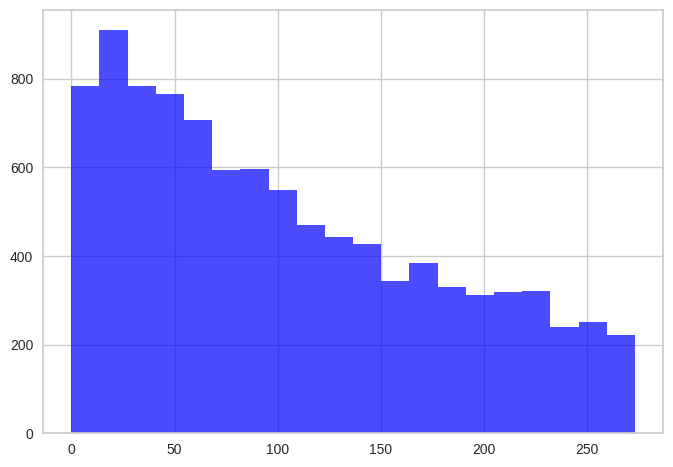

In [273]:
# histogram
plt.hist(df1['gap'], bins=20, color='blue', alpha=0.7)

In [274]:
df2 = df1[['converted','product_type','channel','message_number','customer_country','age','hour','gap']]
df2.head()

,converted,product_type,channel,message_number,customer_country,age,hour,gap
customer_id,,,,,,,,
3d8d8864b7b853bbd47329484c9cc072,0,Energy,Email,39.0,NZ,32.0,17,269
c72bc8d72687f78c0b255583eaff54e9,0,CreditCard,Email,39.0,UK,54.0,8,270
400836904a0e58d2cc66cf7e9afaebe1,0,BNPL,Email,39.0,NZ,26.0,11,271
342991767559fd5eeab7261bdf2e8131,0,BNPL,SMS,39.0,NZ,25.0,9,270
94974d8b8e75fd17eb41b8b5c2c46c9e,0,CreditCard,Email,39.0,UK,56.0,14,267


In [275]:
# merge df2 and df1_clicks
df2 = df2.join(df1_clicks, how='inner')
df2.head()

,converted,product_type,channel,message_number,customer_country,age,hour,gap,clicked
customer_id,,,,,,,,,
3d8d8864b7b853bbd47329484c9cc072,0,Energy,Email,39.0,NZ,32.0,17,269,1
c72bc8d72687f78c0b255583eaff54e9,0,CreditCard,Email,39.0,UK,54.0,8,270,1
400836904a0e58d2cc66cf7e9afaebe1,0,BNPL,Email,39.0,NZ,26.0,11,271,1
342991767559fd5eeab7261bdf2e8131,0,BNPL,SMS,39.0,NZ,25.0,9,270,4
94974d8b8e75fd17eb41b8b5c2c46c9e,0,CreditCard,Email,39.0,UK,56.0,14,267,0


In [276]:
# get dummies
dummies_product_type = pd.get_dummies(df2['product_type'],prefix='product')
dummies_channel = pd.get_dummies(df2['channel'],prefix='channel')
dummies_cust_country = pd.get_dummies(df2['customer_country'],prefix='cust_country')

df2=pd.concat([df2,dummies_product_type,dummies_channel,dummies_cust_country],axis=1)
df2.head()

,converted,product_type,channel,message_number,customer_country,age,hour,gap,clicked,product_BNPL,product_CreditCard,product_Energy,channel_Email,channel_SMS,cust_country_CA,cust_country_NZ,cust_country_UK
customer_id,,,,,,,,,,,,,,,,,
3d8d8864b7b853bbd47329484c9cc072,0,Energy,Email,39.0,NZ,32.0,17,269,1,0,0,1,1,0,0,1,0
c72bc8d72687f78c0b255583eaff54e9,0,CreditCard,Email,39.0,UK,54.0,8,270,1,0,1,0,1,0,0,0,1
400836904a0e58d2cc66cf7e9afaebe1,0,BNPL,Email,39.0,NZ,26.0,11,271,1,1,0,0,1,0,0,1,0
342991767559fd5eeab7261bdf2e8131,0,BNPL,SMS,39.0,NZ,25.0,9,270,4,1,0,0,0,1,0,1,0
94974d8b8e75fd17eb41b8b5c2c46c9e,0,CreditCard,Email,39.0,UK,56.0,14,267,0,0,1,0,1,0,0,0,1


In [277]:
# get percent number of clicks
df2['clicked_over_msg_no'] = df2['clicked']/df2['message_number']

In [278]:
df2 = df2.drop(columns=['message_number','product_type','channel','customer_country','clicked','message_number'])
df2.head()

,converted,age,hour,gap,product_BNPL,product_CreditCard,product_Energy,channel_Email,channel_SMS,cust_country_CA,cust_country_NZ,cust_country_UK,clicked_over_msg_no
customer_id,,,,,,,,,,,,,
3d8d8864b7b853bbd47329484c9cc072,0,32.0,17,269,0,0,1,1,0,0,1,0,0.025641
c72bc8d72687f78c0b255583eaff54e9,0,54.0,8,270,0,1,0,1,0,0,0,1,0.025641
400836904a0e58d2cc66cf7e9afaebe1,0,26.0,11,271,1,0,0,1,0,0,1,0,0.025641
342991767559fd5eeab7261bdf2e8131,0,25.0,9,270,1,0,0,0,1,0,1,0,0.102564
94974d8b8e75fd17eb41b8b5c2c46c9e,0,56.0,14,267,0,1,0,1,0,0,0,1,0.000000


# K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

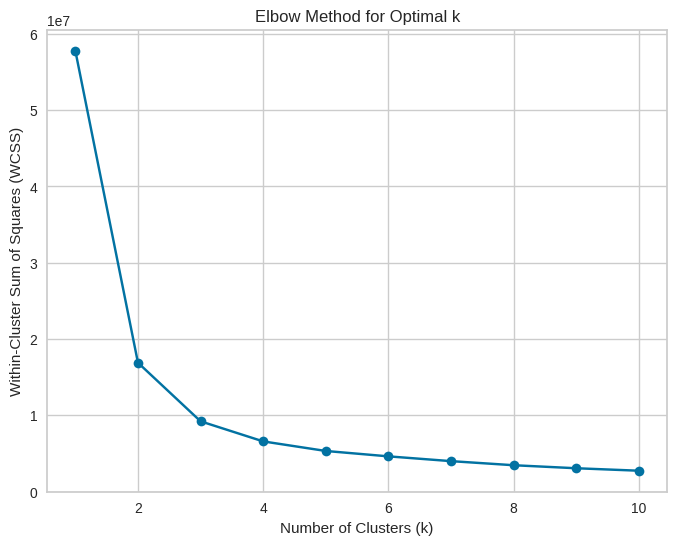

In [279]:
from sklearn.cluster import KMeans
# Calculate WCSS for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

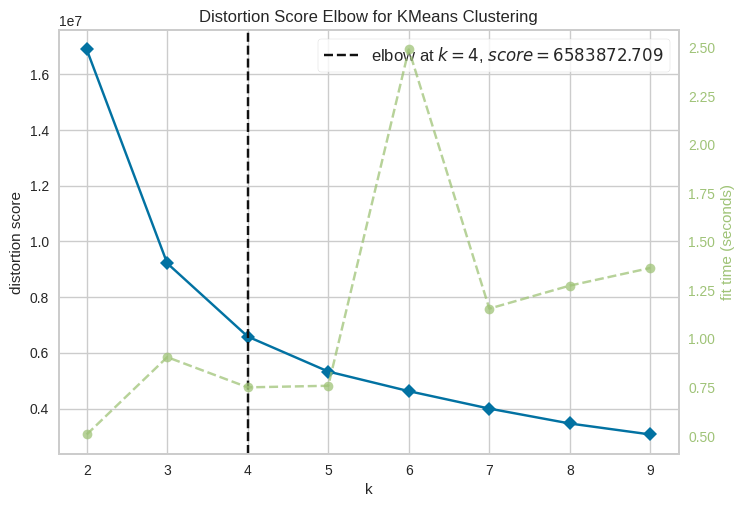

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [280]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(df2)        # Fit the data to the visualizer
visualizer.show()

In [281]:
# choose n_clusters = 4
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,random_state=42)

# Fit data to model
km.fit(df2)

# Get labels
labels = km.predict(df2)

# Create new dataframe with features and labels
new_data = df2.copy()

# Add labels to new_data dataframe
new_data['labels']=labels

new_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,converted,age,hour,gap,product_BNPL,product_CreditCard,product_Energy,channel_Email,channel_SMS,cust_country_CA,cust_country_NZ,cust_country_UK,clicked_over_msg_no,labels
customer_id,,,,,,,,,,,,,,
3d8d8864b7b853bbd47329484c9cc072,0,32.0,17,269,0,0,1,1,0,0,1,0,0.025641,2
c72bc8d72687f78c0b255583eaff54e9,0,54.0,8,270,0,1,0,1,0,0,0,1,0.025641,2
400836904a0e58d2cc66cf7e9afaebe1,0,26.0,11,271,1,0,0,1,0,0,1,0,0.025641,2
342991767559fd5eeab7261bdf2e8131,0,25.0,9,270,1,0,0,0,1,0,1,0,0.102564,2
94974d8b8e75fd17eb41b8b5c2c46c9e,0,56.0,14,267,0,1,0,1,0,0,0,1,0.000000,2


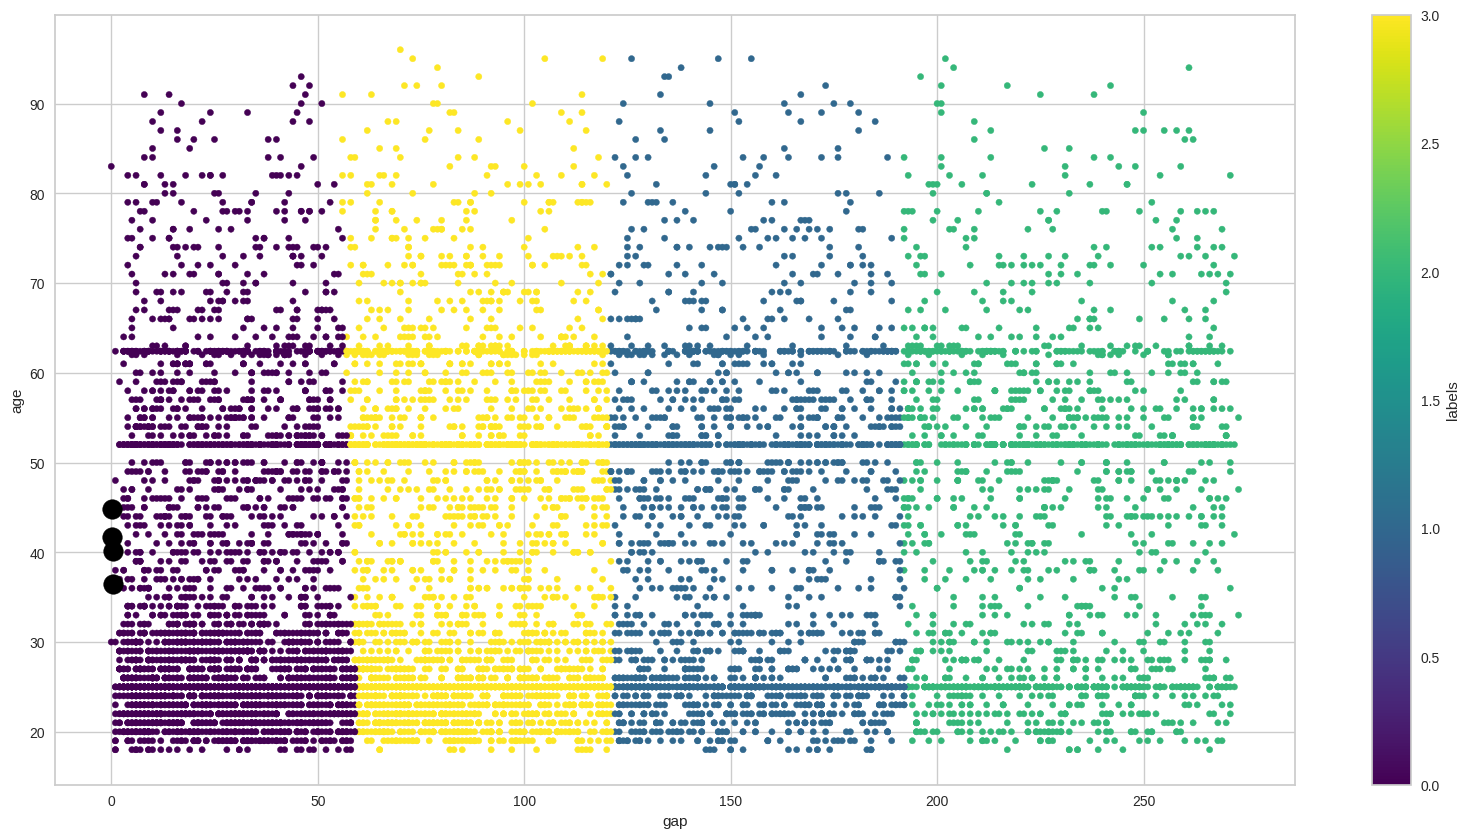

In [283]:
# plot data points and colorize based on label
new_data.plot.scatter(x='gap',
                      y = 'age',
                      c = 'labels',
                      cmap = 'viridis',
                      figsize=(20,10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],s=200,color='black')

In [284]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,converted,age,hour,gap,product_BNPL,product_CreditCard,product_Energy,channel_Email,channel_SMS,cust_country_CA,cust_country_NZ,cust_country_UK,clicked_over_msg_no,labels
count,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.0
mean,0.462007,36.486508,11.403422,28.710557,0.657483,0.177494,0.165023,0.619780,0.380220,0.379060,0.205916,0.415023,0.220419,0.0
std,0.498627,16.612424,2.901829,16.218152,0.474620,0.382142,0.371255,0.485511,0.485511,0.485224,0.404428,0.492797,0.288651,0.0
min,0.000000,18.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,25.000000,9.000000,14.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,29.000000,10.000000,28.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0
75%,1.000000,50.000000,13.000000,43.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.333333,0.0
max,1.000000,93.000000,19.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [285]:
# Cluster 1
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,converted,age,hour,gap,product_BNPL,product_CreditCard,product_Energy,channel_Email,channel_SMS,cust_country_CA,cust_country_NZ,cust_country_UK,clicked_over_msg_no,labels
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.0
mean,0.235768,41.699323,11.321914,154.347103,0.486650,0.272040,0.241310,0.608564,0.391436,0.244332,0.295718,0.459950,0.053897,1.0
std,0.424585,17.969464,2.871693,20.367217,0.499948,0.445123,0.427986,0.488195,0.488195,0.429799,0.456480,0.498519,0.054220,0.0
min,0.000000,18.000000,8.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,25.000000,9.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,39.000000,10.000000,153.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.045455,1.0
75%,0.000000,55.000000,13.000000,171.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.083333,1.0
max,1.000000,95.000000,19.000000,192.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.350000,1.0


In [286]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,converted,age,hour,gap,product_BNPL,product_CreditCard,product_Energy,channel_Email,channel_SMS,cust_country_CA,cust_country_NZ,cust_country_UK,clicked_over_msg_no,labels
count,1652.00000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.0
mean,0.08293,44.833613,11.630751,229.065981,0.380145,0.347458,0.272397,0.619855,0.380145,0.196126,0.319007,0.484867,0.042368,2.0
std,0.27586,17.877128,3.017289,23.000985,0.485569,0.476307,0.445328,0.485569,0.485569,0.397185,0.466233,0.499922,0.040400,0.0
min,0.00000,18.000000,8.000000,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.00000,25.750000,9.000000,210.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,0.00000,47.000000,11.000000,227.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.032258,2.0
75%,0.00000,58.000000,14.000000,248.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.064516,2.0
max,1.00000,95.000000,19.000000,273.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.233333,2.0


In [287]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,converted,age,hour,gap,product_BNPL,product_CreditCard,product_Energy,channel_Email,channel_SMS,cust_country_CA,cust_country_NZ,cust_country_UK,clicked_over_msg_no,labels
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.0
mean,0.354089,40.185547,11.400225,87.804201,0.541635,0.231433,0.226932,0.605776,0.394224,0.30045,0.238560,0.460990,0.075466,3.0
std,0.478326,18.123654,2.923667,18.210936,0.498357,0.421827,0.418927,0.488775,0.488775,0.45854,0.426283,0.498569,0.078591,0.0
min,0.000000,18.000000,8.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.0
25%,0.000000,25.000000,9.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.0
50%,0.000000,33.000000,10.000000,87.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.071429,3.0
75%,1.000000,54.000000,13.000000,103.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.111111,3.0
max,1.000000,96.000000,19.000000,121.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.500000,3.0
